# 0. Contents

1. Describe analysis on sales 

2. Distribution of orders by loyalty status

3. Analysis of expenditure by hour of day

4. Analysis of age vs number of dependents 

5. Analysis of age vs income

# 1. Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
# creating main path
path = r'C:\Users\muffi\OneDrive\CareerFoundry\Instacart Basket Analysis 2023'

In [3]:
# importing main df
df_main = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 2. Sample Visuals 

This was completed in a separete notebooks

# 3. Descriptive Analysis on Sales

In [8]:
# viewing col names
df_main.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'med_order_freq', 'first_name', 'last_name', 'sex',
       'state', 'age', 'date_joined', 'number_of_dependents', 'fam_status',
       'income', '_merge'],
      dtype='object')

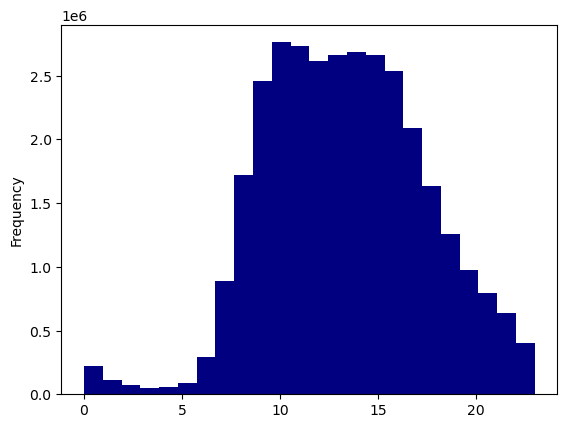

In [15]:
# histogram of the sales by hour
sales_bar = df_main['order_hour_of_day'].plot.hist(bins = 24, color = 'navy')

As seen in the histogram, most orders occur between 10 am and 3pm. From midnight to 5 am are when the fewest orders occur.

# 4. Distribution of Orders By Loyalty Status

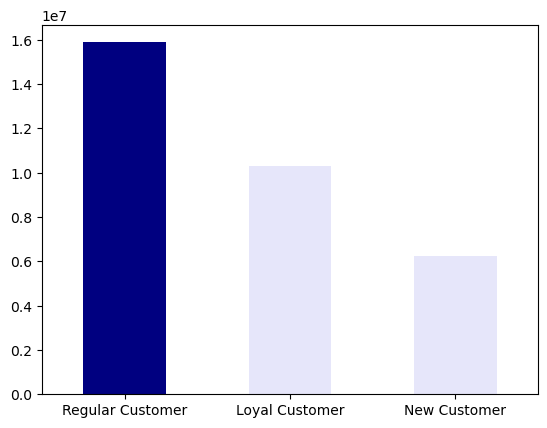

In [4]:
# bar graph of orders by loyalty status
loyalty_bar = df_main['loyalty_flag'].value_counts().plot.bar(rot = 0, color = ['navy', 'lavender', 'lavender'])

Regular customers place the most orders, followed loyal then new customers. 

# 5. Expenditure By Hour of Day

## 5.1. Creating the Random Sample

In [16]:
# creating the set of random numbers
np.random.seed(4)

In [19]:
# boolean stating whether the generated random value is <= 0.7
split = np.random.rand(len(df_main)) <= 0.7

In [25]:
# creating a random sample of 70% of the data
big_sample = df_main[split]

In [27]:
# creating a random sample of 30% of the data
small_sample = df_main[~split]

In [28]:
# checking the length of the main df
len(df_main)

32404859

In [29]:
# checking that the sample lengths total the main df
len(big_sample) + len(small_sample)

32404859

## 5.2. Line Graph of Expenditures vs. Hour of Day

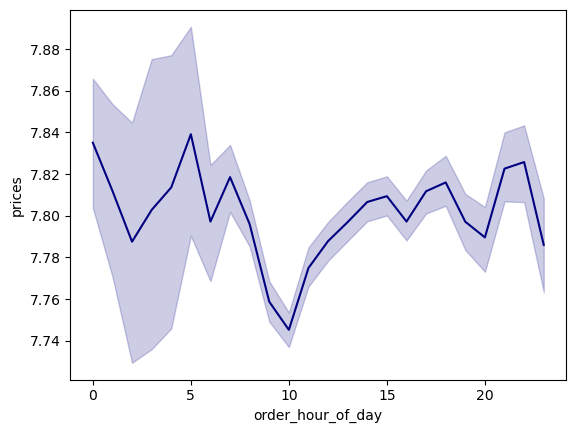

In [37]:
price_line = sns.lineplot(data = small_sample, x = 'order_hour_of_day', y = 'prices', color = 'navy')

Generally speaking, there is little to no relationship between time of day and order price, with the exception that cheaper things are usually bought around 10 am.

# 6. Relationship Between Age and Number of Dependents

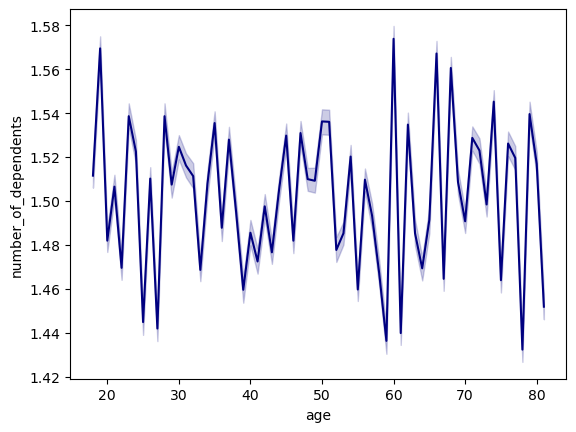

In [38]:
# line plot of age vs. number of dependents using the smaller sample 
line_dep = sns.lineplot(data = small_sample, x = 'age', y = 'number_of_dependents', color = 'navy')

The variable nature of the graph shows that there is no correlation between age and number of dependents 

# 7. Relationship Between Age and Income

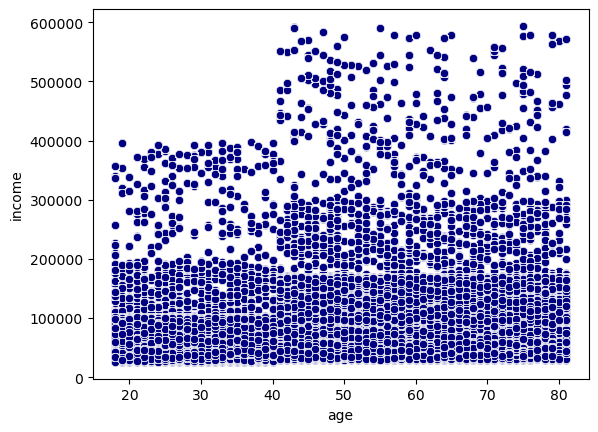

In [35]:
# scatterplot of the age vs. income using the entire df
income_scatter = sns.scatterplot(data = df_main, x = 'age', y = 'income', color = 'navy')

The points of the graph do not follow a general trend, and thus there is no correcation between age and income. With that said, most point were located under 200,000 indicating that most customers make less than $200,000 (which is very reasonable).

# 8. Exporting Visualizations

In [41]:
# exporting the histogram
sales_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_histogram.png'))

In [5]:
# exporting the bar graph
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [44]:
# exporting the 1st hour vs. price line graph
price_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_vs_price_line.png'))

In [46]:
# exporting the age vs # dependents line graph 
line_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_dep_line.png'))

In [47]:
# exporting the age vs income scatterplot
income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_income_scatter.png'))